# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [86]:
# Import numpy and pandas
import pandas as pd
import numpy as np


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [87]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [88]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [89]:
# Your code here:
sensor.isna().sum()
#sensor.dropna(inplace = True) 

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [90]:
# Your code here:
sensor.shape


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`.

In [91]:
# Your code here:
sensor['time']=pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=1751)
sensor.index = pd.DatetimeIndex(sensor['time'])
sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,time
time,,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874,2018-01-01 00:29:06
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738,2018-01-01 00:29:07
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740,2018-01-01 00:29:08


Assign the time series index to the dataframe's index.

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

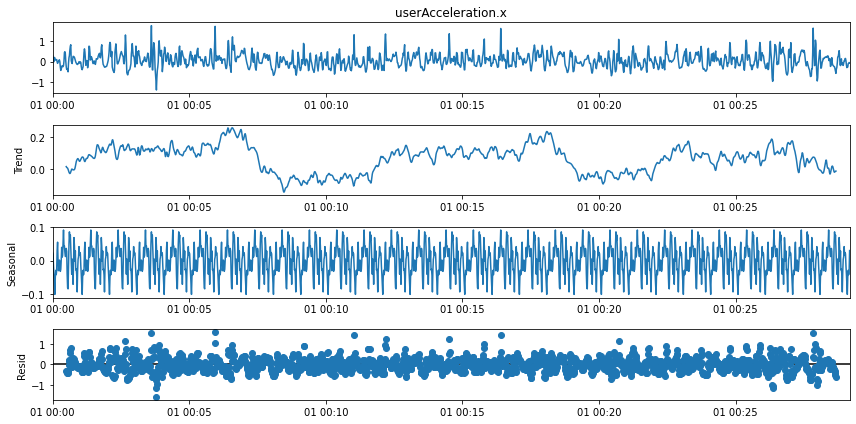

In [92]:
# Your code here:
import statsmodels.api as sm
import matplotlib.pyplot as plt

dec = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], period=60) 
#method just needs series, returns object we can store as a variable and plot it
plt.rcParams['figure.figsize'] = (12, 6)
dec.plot()
plt.show()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

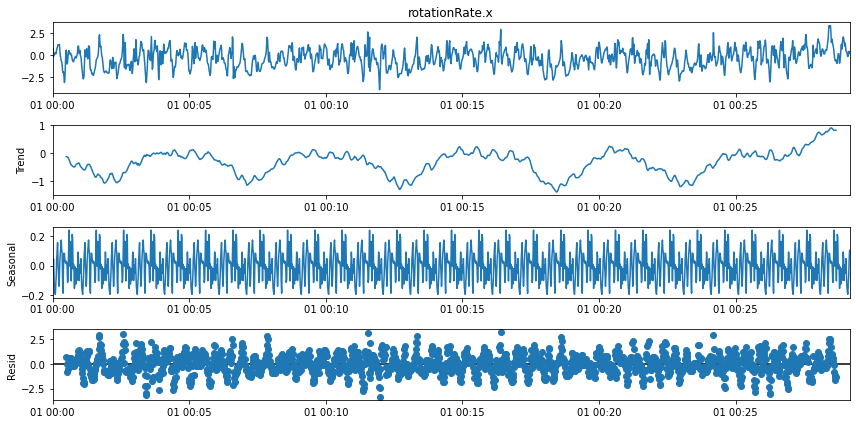

In [93]:
dec = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], period=60) 
dec.plot()
plt.show()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

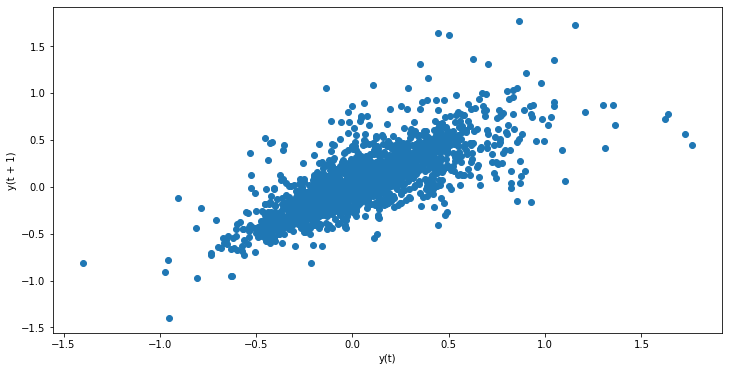

In [94]:
# Your code here:
from pandas.plotting import lag_plot
lag_plot(sensor['userAcceleration.x'])


Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

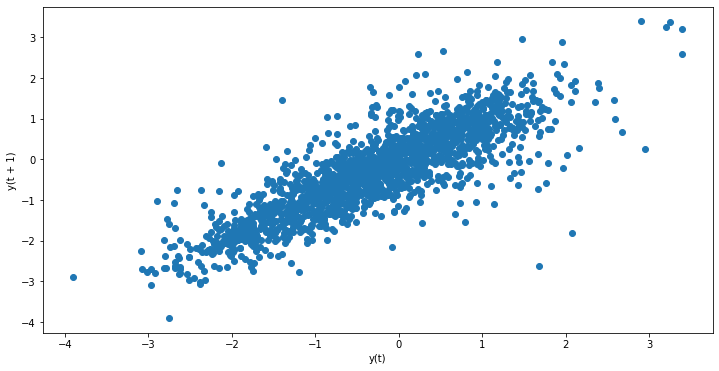

In [95]:
# Your code here:
lag_plot(sensor['rotationRate.x'])


What are your conclusions from both visualizations?

In [96]:
# Your conclusions here:
##NO IDEA ###


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [97]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

adfuller(sensor['userAcceleration.x'])[1]


2.823439483037483e-30

In [98]:
#adfuller(sensor['rotationRate.x'])
print(adfuller(sensor['rotationRate.x'])[1])


6.320230335912249e-06


What are your conclusions from this test?

In [99]:
# Your conclusions here:

#ANSWER: both are stationary I suppose

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [100]:
# Your code here:
from statsmodels.tsa.arima.model import ARIMA

In [121]:
model = ARIMA(sensor['userAcceleration.x'], order=(2,0, 1),freq='S').fit()
model.summary()

/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1748
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 377.744
Date:                Fri, 27 Nov 2020   AIC                           -745.488
Time:                        23:05:00   BIC                           -718.156
Sample:                    01-01-2018   HQIC                          -735.384
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0620      0.016      3.888      0.000       0.031       0.093
ar.L1          0.9895      0.036     27.747      0.000       0.920       1.059
ar.L2         -0.3793      0.032    -11.689      0.000      -0.443      -0.316
ma.L1          0.1814      0.039      4.632      0.000       0.105       0.258
sigma2         0.0380      0.001     46.218      0.000       0.036       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1807.22
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.35
Prob(H) (two-sided):                  0.62   Kurtosis:                         7.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
train = sensor['userAcceleration.x'][:-10]
test=sensor['userAcceleration.x'][-10:]#hätte man auch mit tail() aufrufen können

pred=model.predict(start=len(train), end=len(train)+10)
pred


2018-01-01 00:29:01    0.172589
2018-01-01 00:29:02    0.115033
2018-01-01 00:29:03   -0.008451
2018-01-01 00:29:04   -0.186956
2018-01-01 00:29:05   -0.229421
2018-01-01 00:29:06   -0.136611
2018-01-01 00:29:07   -0.162780
2018-01-01 00:29:08    0.035557
2018-01-01 00:29:09   -0.043621
2018-01-01 00:29:10    0.008237
2018-01-01 00:29:11   -0.035183
Freq: S, Name: predicted_mean, dtype: float64

In [123]:
pd.DataFrame(zip(pred,test),columns={'Predicted Values','True Values'})

,Predicted Values,True Values
0,0.172589,0.149749
1,0.115033,0.038461
2,-0.008451,-0.169175
3,-0.186956,-0.300361
4,-0.229421,-0.270174
5,-0.136611,-0.268367
6,-0.162780,-0.102444
7,0.035557,-0.085590
8,-0.043621,-0.048105
9,0.008237,-0.065011


#### Since I dont like the prediction accuracy I'll try to use the difference of sensor['userAcceleration.x']

In [124]:
sensor['userAcceleration.x_diff'] = sensor['userAcceleration.x'].diff()
sensor.dropna(inplace = True) #erste Zeitel wird immer NaN wenn man Differenz erzeugt weil erste Zeile ja von nicht abgezogen werden kann

In [130]:
model = ARIMA(sensor['userAcceleration.x_diff'], order=(2,0,1),freq='S').fit()
train = sensor['userAcceleration.x_diff'][:-10]
test_diff=sensor['userAcceleration.x_diff'][-10:]#hätte man auch mit tail() aufrufen können

pred_diff=model.predict(start=len(train), end=len(train)+10)

pd.DataFrame(zip(pred_diff,test_diff),columns={'Predicted Values','True Values'})

/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


,Predicted Values,True Values
0,0.022191,0.009538
1,-0.030836,-0.111288
2,-0.049811,-0.207636
3,-0.022797,-0.131186
4,0.060663,0.030187
5,0.127885,0.001807
6,0.113245,0.165923
7,0.133627,0.016854
8,0.055280,0.037485
9,0.051864,-0.016906


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [134]:
# Your code here:
from statsmodels.tools.eval_measures import rmse
rmse(pred[:-1],test, axis=0)


0.09370184193665403